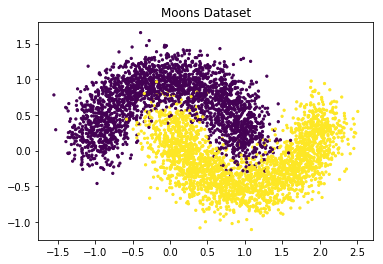

In [24]:
# (p. 184) Ensemble Learning
# 1) generate data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=5000, noise=0.2)

# generate test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# visualize data

plt.scatter(X[:,0], X[:,1], s=5, c=y)
plt.title("Moons Dataset")

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ],
    voting = 'hard'
)
voting_clf.fit(X, y)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(clf.__class__.__name__, acc)



LogisticRegression 0.876
RandomForestClassifier 0.972
SVC 0.973
VotingClassifier 0.974
